In [151]:
#importing the Libraries
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import zscore
import sklearn.model_selection as skl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

In [152]:
#Reading Data into Memory
df = pd.read_csv("Data/Parkinsson disease.csv")

In [153]:
# View the top 5 Data
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [154]:
#Filter all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

#normalize all numeric columns using Zscore
norm_feat = df[numeric_cols].apply(zscore)
norm_feat

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,0.571429,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,0.571429,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,0.571429,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,0.571429,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,0.571429,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,0.631498,...,0.759930,0.069278,-0.536647,-1.750000,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703
191,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,-0.099041,...,0.037108,-0.167360,-0.620463,-1.750000,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929
192,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,-0.135053,...,-0.294679,2.041513,-0.906799,-1.750000,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410
193,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,-0.212223,...,-0.297970,1.175327,-0.649233,-1.750000,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105


In [5]:
corr = norm_feat.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<AxesSubplot:>

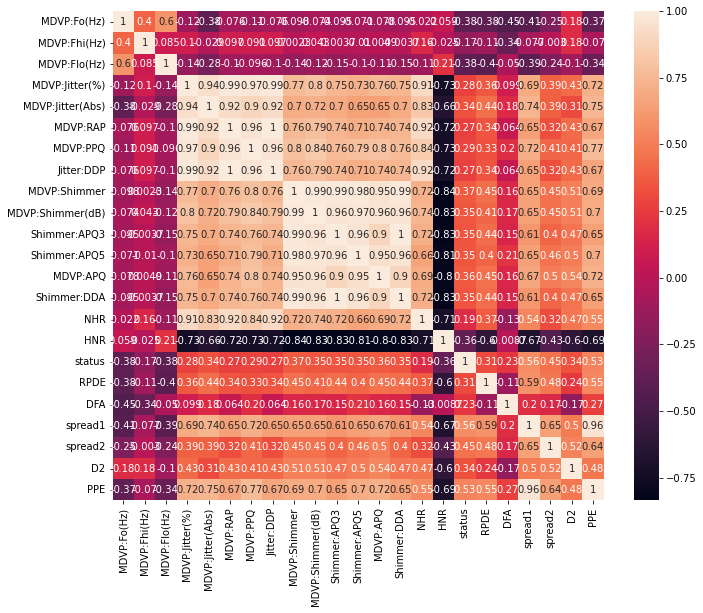

In [6]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True)

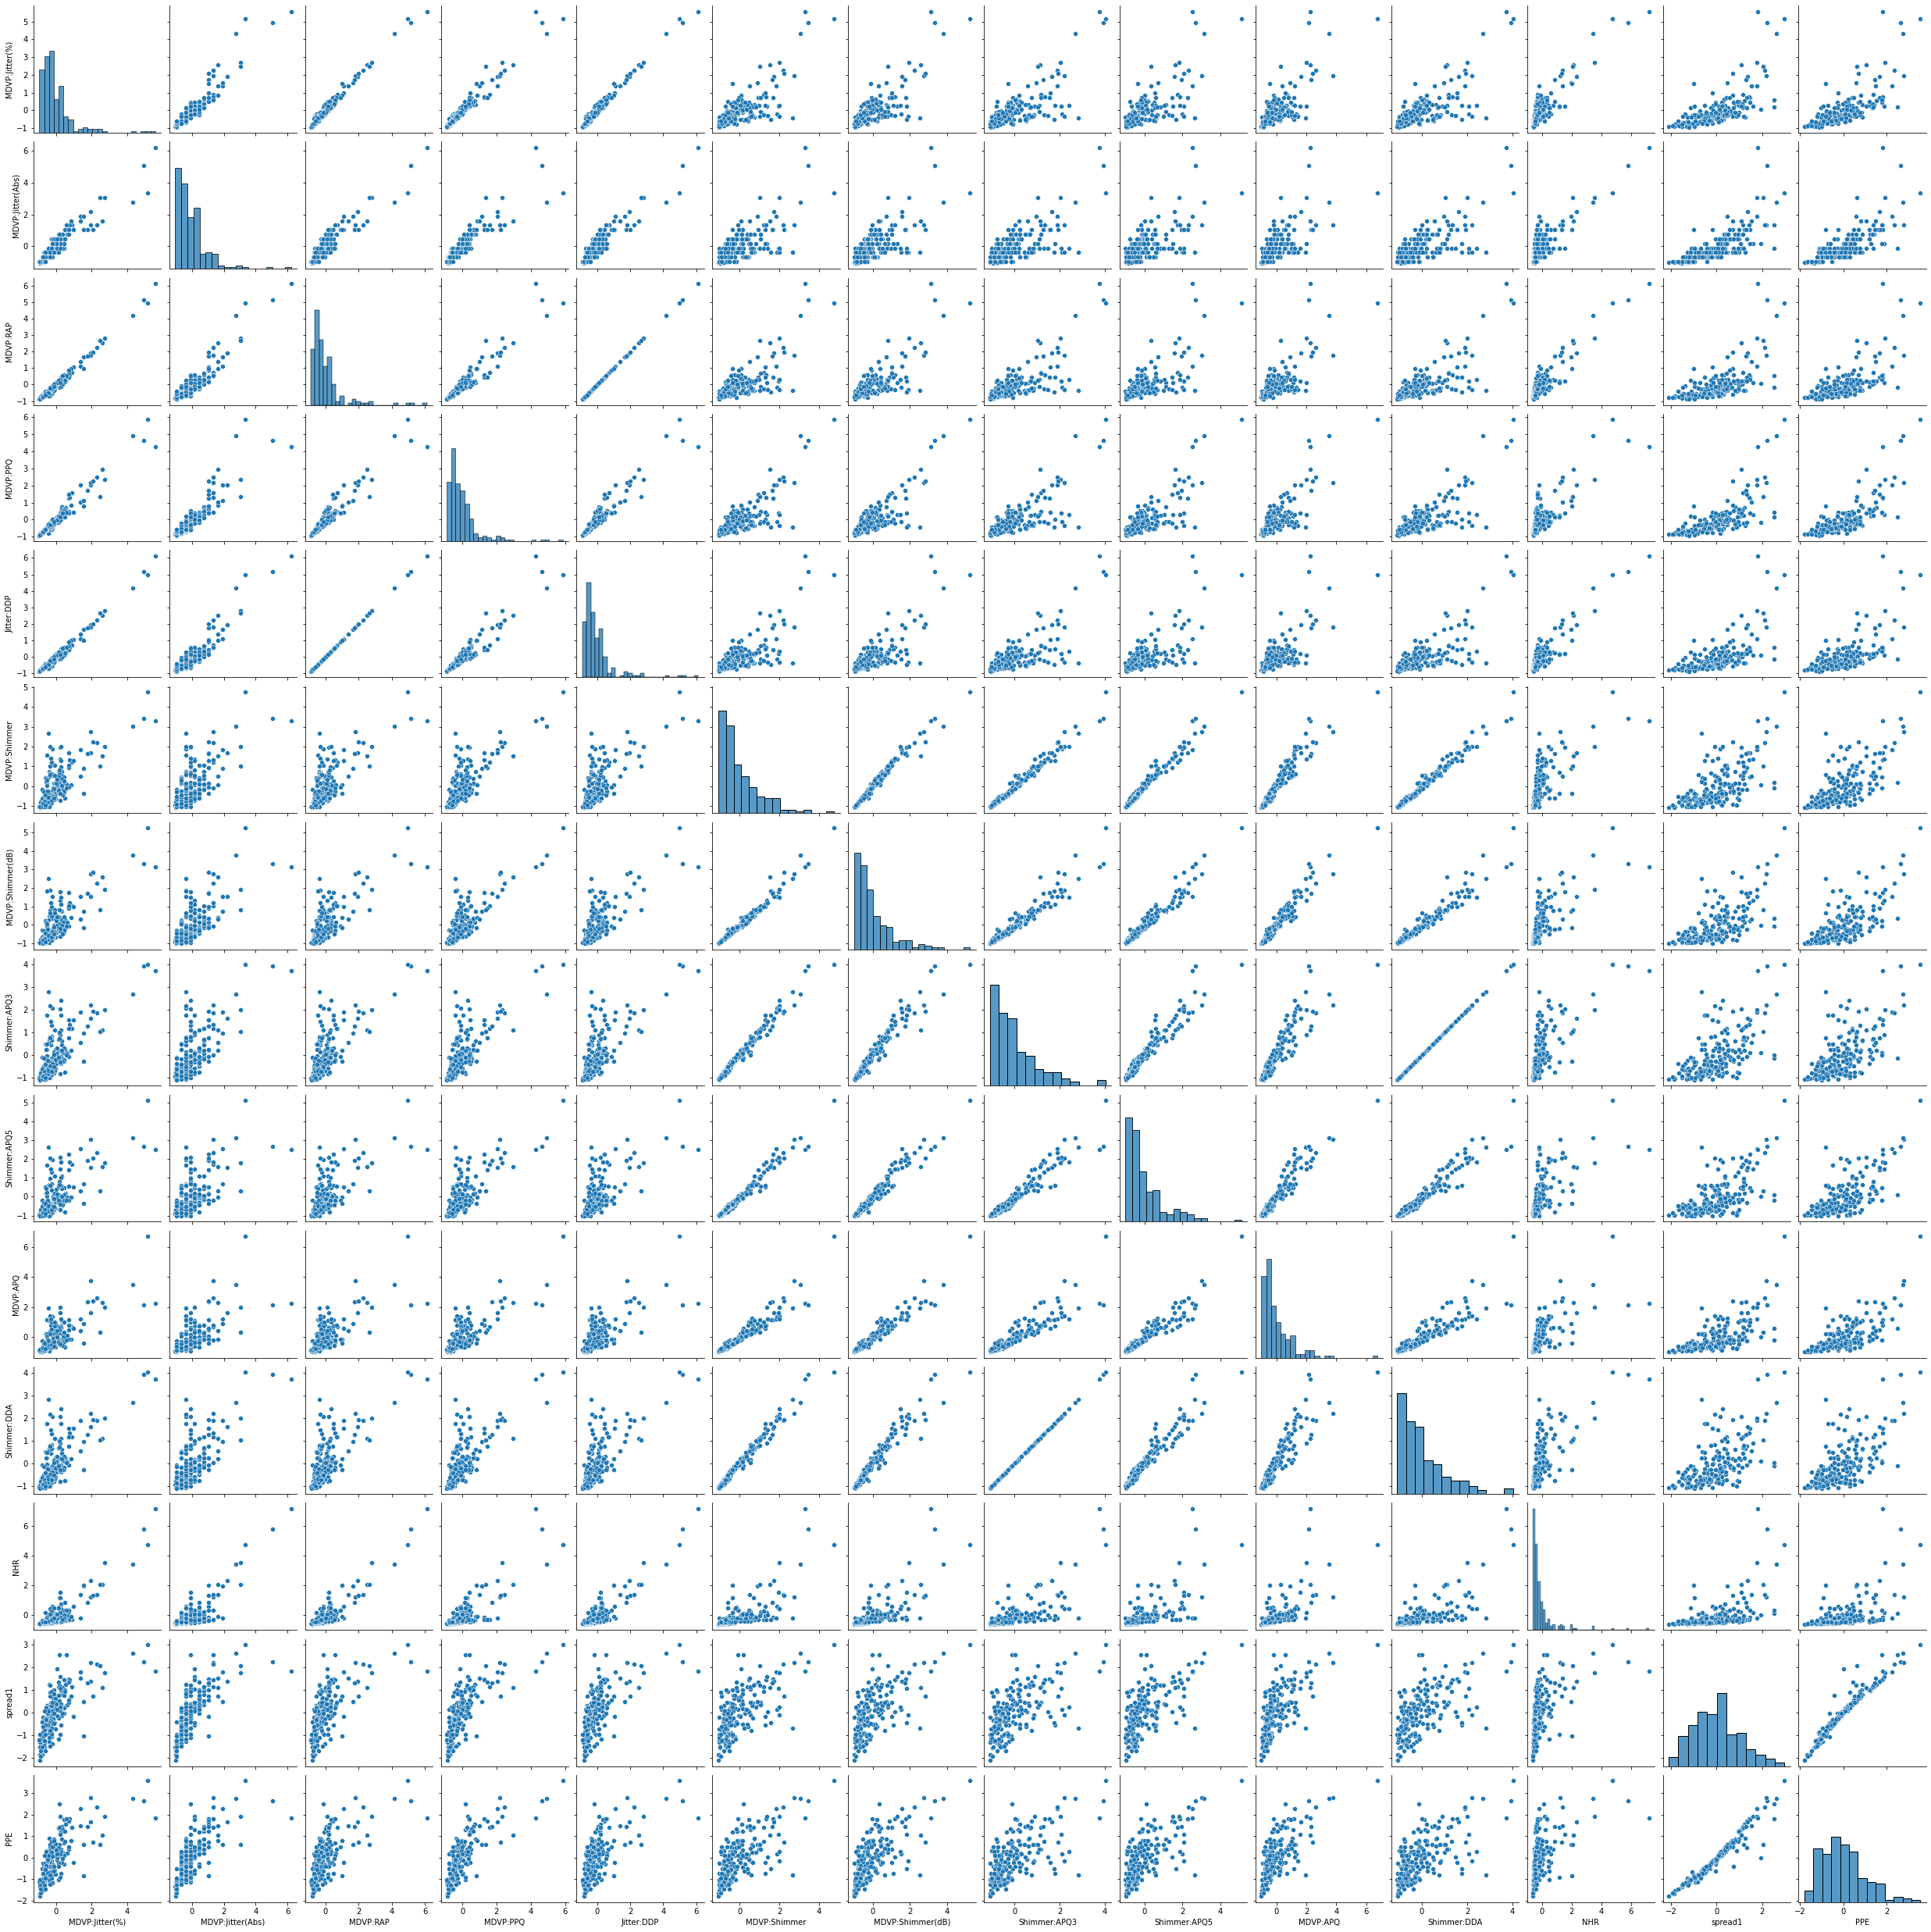

In [7]:
sns.pairplot(norm_feat);

In [155]:
# Drop Columns with Low Correlation
columns=['status','MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR', 'DFA','spread2', 'D2', 'RPDE', 'name']
X = df.drop(columns=columns)
y = df["status"]
corr = X.corr()

Text(0.5, 1.0, 'Status Balance')

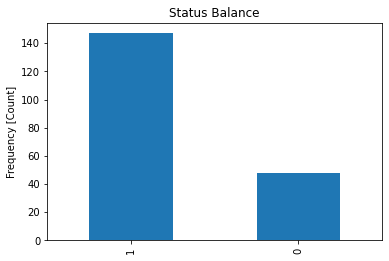

In [156]:
y.value_counts().plot(kind="bar")
plt.ylabel("Frequency [Count]");
plt.title("Status Balance")

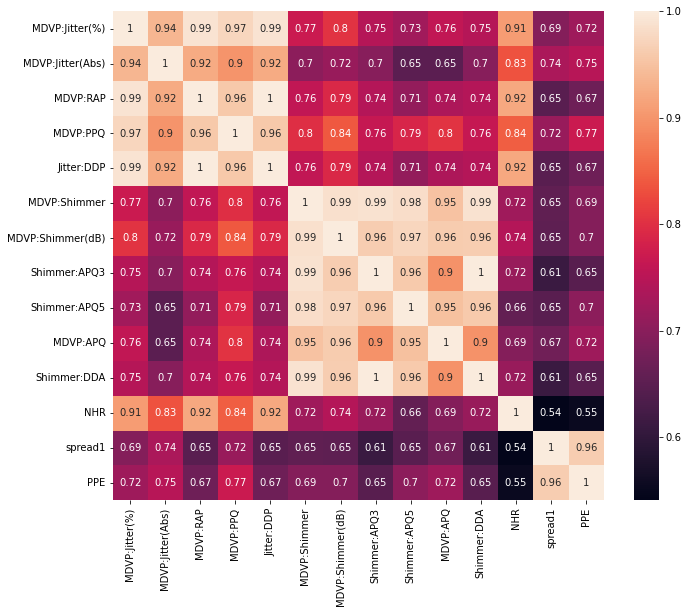

In [157]:
#Heatmap of Our newly selected Features based on their Correlation Correlation
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, annot=True)
colums = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'HNR']

In [158]:
# Split the dataset into training and validation set
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.2, random_state=42
)

#  MODEL EVALUATION

For us to appreciate the performance (accuracy) of our classification model we need to compare it to some standard (baseline accuracy)

In [159]:
# Calculating the Baseline Accuracy of our model
# The naive way to think about it is that the majority class shows up in the training data set

acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.7372


# Data Imbalance

For a Classification Task we would expect the training set to  have equal proportion of  +ve and -ve cases of Parkison Disease

In [160]:
# Balancing the Data through Over Sampling using the Imbalance Library
# Instead or reducing the majority class we increase the minority class

over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

In [161]:
len(X_train_over)

230

In [72]:
##Balancing the Data through Under Sampling using the Imbalance Library
# Adjusting the training set to  have equal proportion of  +ve and -ve cases of Parkison Disease
# p_inds = train_df[train_df.status==1].index.tolist()
# np_inds = train_df[train_df.status==0].index.tolist()

# np_sample = sample(p_inds,len(np_inds))

# train_df = train_df.loc[np_inds+ np_sample]

In [136]:
#Make Pipeline allows us to define a set of steps to process data for machine learning incase of repeated processes

clf = make_pipeline(RandomForestClassifier(random_state=42))
clf

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [137]:
# Dictionary Object of Hyper Parameters
params ={   
    "randomforestclassifier__n_estimators":range(100,500, 100),
    "randomforestclassifier__max_depth":range(10,50,10)    
}
params

{'randomforestclassifier__n_estimators': range(100, 500, 100),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [138]:
#Hpyer Parameter Tunning
model = GridSearchCV(
clf,
param_grid=params,
cv=5,
n_jobs = -1,
verbose =1,
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(100, 500, 100)},
             verbose=1)

In [139]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(100, 500, 100)},
             verbose=1)

In [140]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.195601,0.004924,0.021200,0.005980,10,100,"{'randomforestclassifier__max_depth': 10, 'ran...",0.869565,0.956522,0.913043,0.891304,0.978261,0.921739,0.040320,9
1,0.439199,0.041664,0.037800,0.005418,10,200,"{'randomforestclassifier__max_depth': 10, 'ran...",0.891304,0.956522,0.913043,0.891304,0.978261,0.926087,0.035322,1
2,0.605601,0.030664,0.056000,0.008319,10,300,"{'randomforestclassifier__max_depth': 10, 'ran...",0.913043,0.956522,0.891304,0.891304,0.978261,0.926087,0.035322,1
3,0.823002,0.092909,0.064999,0.005583,10,400,"{'randomforestclassifier__max_depth': 10, 'ran...",0.891304,0.956522,0.891304,0.869565,0.978261,0.917391,0.042154,13
4,0.235800,0.042892,0.018000,0.001898,20,100,"{'randomforestclassifier__max_depth': 20, 'ran...",0.869565,0.956522,0.913043,0.891304,0.978261,0.921739,0.040320,9
5,0.390399,0.027933,0.033200,0.000980,20,200,"{'randomforestclassifier__max_depth': 20, 'ran...",0.891304,0.956522,0.913043,0.891304,0.978261,0.926087,0.035322,1
6,0.722997,0.089543,0.061000,0.012946,20,300,"{'randomforestclassifier__max_depth': 20, 'ran...",0.913043,0.956522,0.891304,0.891304,0.978261,0.926087,0.035322,1
7,0.828275,0.063920,0.067603,0.005085,20,400,"{'randomforestclassifier__max_depth': 20, 'ran...",0.891304,0.956522,0.891304,0.869565,0.978261,0.917391,0.042154,13
8,0.201199,0.010610,0.017200,0.001167,30,100,"{'randomforestclassifier__max_depth': 30, 'ran...",0.869565,0.956522,0.913043,0.891304,0.978261,0.921739,0.040320,9
9,0.395400,0.015882,0.032912,0.000911,30,200,"{'randomforestclassifier__max_depth': 30, 'ran...",0.891304,0.956522,0.913043,0.891304,0.978261,0.926087,0.035322,1


In [141]:
#Extract Best Hyperparameters
model.best_estimator_

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [142]:
model.best_score_

0.9260869565217391

In [145]:
model.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 200}

In [146]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9231


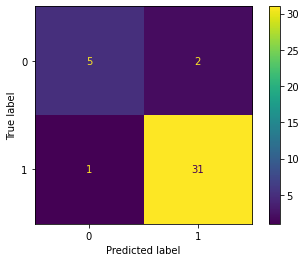

In [149]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


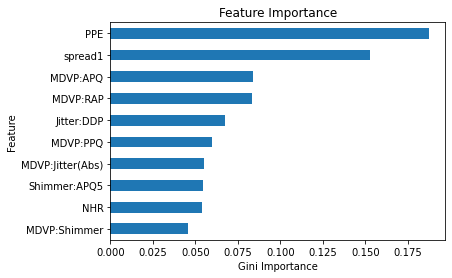

In [150]:
# Get feature names from training data
features = X_test.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")

plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");